In [60]:
import sys
sys.path.insert(0, '../../..')
from metrics import evaluate_classification
from plots import plot_decision_boundary, plot_data

from sklearn.datasets import make_classification, make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [61]:
class NeuralNet:
    def __init__(self, normalize = True, learning_rate = 0.01, num_iter = 30000):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.normalize = normalize
    
    def __normalize(self, X, mean = None, std = None):
        n = X.shape[0]
        m = mean
        if m is None:
            m = np.mean(X, axis=1).reshape((n, 1))
        s = std
        if s is None:
            s = np.std(X, axis=1).reshape((n, 1))
        X_new = (X - m) / s
        return X_new, m, s

    def __sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def __initialize_parameters(self, n_x, n_1):
        W1 = np.random.randn(n_1, n_x) * 0.01
        b1 = np.zeros((n_1, 1))
        W2 = np.random.randn(1, n_1) * 0.01
        b2 = 0 # у вихідному шарі лише 1 нейрон
        self.parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}
       
    def __forward_propagation(self, X):
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]

        Z1 = np.dot(W1, X) + b1
        A1 = self.__sigmoid(Z1)

        Z2 = np.dot(W2, A1) + b2
        A2 = self.__sigmoid(Z2)

        
        cache = (W1, b1, W2, b2, Z1, A1, Z2, A2)

        return A2, cache
    
    def compute_cost(self, A, Y):
        m = Y.shape[1]
        res = Y * np.log(A) + (1 - Y) * np.log(1 - A)
        J = -(1 / m) * np.sum(res)
        return J
        
    def __backward_propagation(self, X, Y, cache):
        m = X.shape[1]
        n = X.shape[0]
        (W1, b1, W2, b2, Z1, A1, Z2, A2) = cache
        
        dZ2 = A2 - Y
        dW2 = 1. / m * np.dot(dZ2, A1.T)
        db2 = 1. / m * np.sum(dZ2, axis = 1, keepdims = True)
        
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = np.multiply(dA1, np.multiply(A1, 1 - A1))
        dW1 = 1. / m * np.dot(dZ1, X.T)
        db1 = 1. / m * np.sum(dZ1, axis = 1, keepdims = True)
        

        grads = {"dZ1" : dZ1, "dW1" : dW1, "db1" : db1, "dZ2" : dZ2, "dW2" : dW2, "db2" : db2}
        return grads
    
    def __update_parameters(self, grads):
        W1 = self.parameters["W1"]
        b1 = self.parameters["b1"]
        W2 = self.parameters["W2"]
        b2 = self.parameters["b2"]

        dW1 = grads["dW1"]
        db1 = grads["db1"]
        dW2 = grads["dW2"]
        db2 = grads["db2"]
        

        self.parameters["W1"] = W1 - self.learning_rate * dW1
        self.parameters["b1"] = b1 - self.learning_rate * db1
        self.parameters["W2"] = W2 - self.learning_rate * dW2
        self.parameters["b2"] = b2 - self.learning_rate * db2

        
    def fit(self, X_vert, Y_vert, print_cost = True):
        
        X, Y = X_vert.T, Y_vert.T
        
        if self.normalize:
            X, self.__mean, self.__std = self.__normalize(X)
        
        costs = []
        
        m = X.shape[1]
        n_x = X.shape[0]
        
        self.__initialize_parameters(n_x, 20)

        for i in range(self.num_iter):
            A, cache = self.__forward_propagation(X)

            cost = self.compute_cost(A, Y)

            grads = self.__backward_propagation(X, Y, cache)

            self.__update_parameters(grads)

            if print_cost and i % 1000 == 0:
                print("{}-th iteration: {}".format(i, cost))

            if i % 1000 == 0:
                costs.append(cost)

        if print_cost:
            plt.plot(costs)
            plt.ylabel("Cost")
            plt.xlabel("Iteration, *1000")
            plt.show()
    
    def predict_proba(self, X_vert):
        X = X_vert.T
        if self.normalize:
            X, _, _ = self.__normalize(X, self.__mean, self.__std)
        
        probs = self.__forward_propagation(X)[0]
        print(probs.shape)
        result = np.column_stack((1 - probs.T, probs.T))
        print(result.shape)
        return result
    
    def predict(self, X_vert):
        positive_probs = self.predict_proba(X_vert)[:, 1]
        return (positive_probs >= 0.5).astype(int)   


# Симульовані дані 1

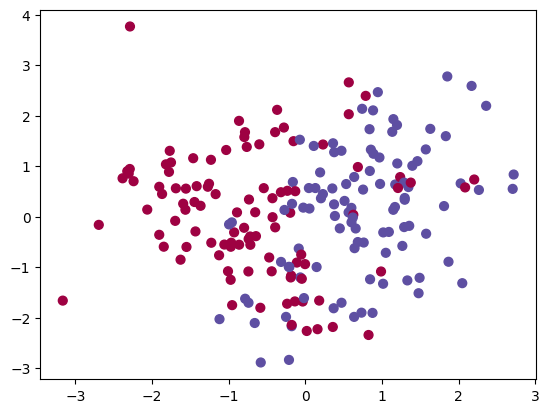

0-th iteration: 0.693333380900371
1000-th iteration: 0.6923741211443005
2000-th iteration: 0.6904498208771629
3000-th iteration: 0.6816703865064849
4000-th iteration: 0.6476693828206654


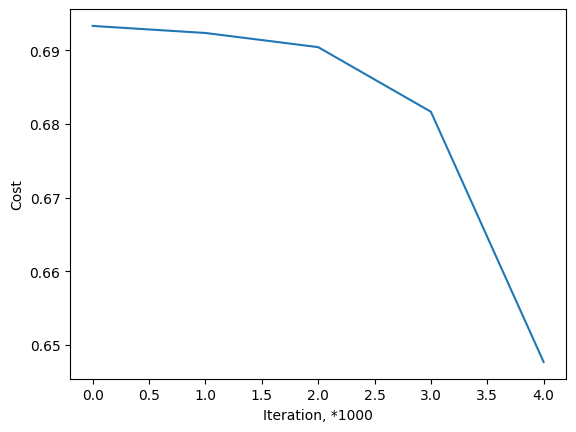

(1, 40)
(40, 2)
Accuracy: 
0.8
Report: 
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        22
           1       0.71      0.94      0.81        18

    accuracy                           0.80        40
   macro avg       0.82      0.81      0.80        40
weighted avg       0.83      0.80      0.80        40

Confusion: 
    0   1
0  15   7
1   1  17
(1, 2500)
(2500, 2)


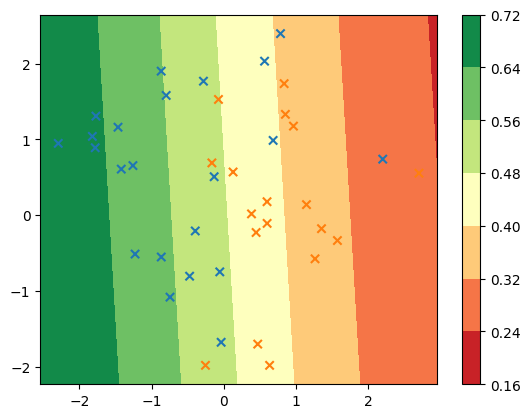

In [62]:
X, y = make_classification(n_samples = 200, n_classes = 2, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42,
                           flip_y=0.02, class_sep=0.8)
plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

nn = NeuralNet(num_iter=5000)
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)

print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

# Симульовані дані 2

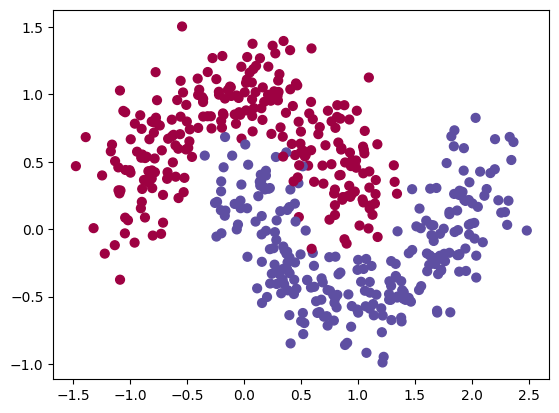

0-th iteration: 0.6930534747948812
1000-th iteration: 0.28175012516766423
2000-th iteration: 0.2810052695991265
3000-th iteration: 0.28061608796791426
4000-th iteration: 0.2803681649376671
5000-th iteration: 0.28019347723122784
6000-th iteration: 0.2800625851264357
7000-th iteration: 0.27995996537764195
8000-th iteration: 0.279876369771146
9000-th iteration: 0.2798058282683552
10000-th iteration: 0.2797442213235539
11000-th iteration: 0.2796884605703601
12000-th iteration: 0.2796358967864979
13000-th iteration: 0.2795836971003736
14000-th iteration: 0.27952772417378285
15000-th iteration: 0.2794590865574121
16000-th iteration: 0.27934563778747906
17000-th iteration: 0.2788833394715343
18000-th iteration: 0.2690231778398679
19000-th iteration: 0.24853945206541356
20000-th iteration: 0.24057495429368664
21000-th iteration: 0.23711531567324998
22000-th iteration: 0.23516655402850548
23000-th iteration: 0.23384475732141638
24000-th iteration: 0.22146055527139852
25000-th iteration: 0.12173

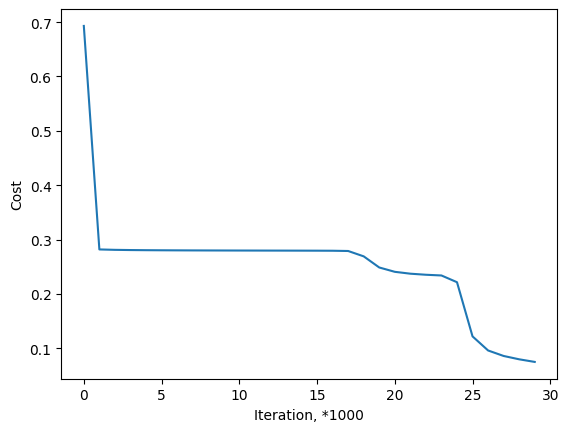

(1, 100)
(100, 2)
Accuracy: 
0.97
Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.95      0.97        57

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

Confusion: 
    0   1
0  43   0
1   3  54
(1, 2500)
(2500, 2)


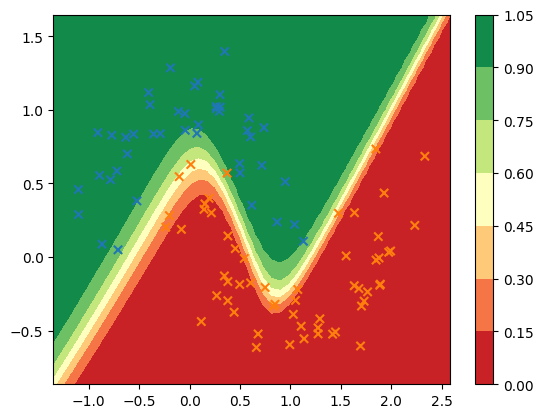

In [63]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

nn = NeuralNet(learning_rate = 0.5)
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

# Tests dataset

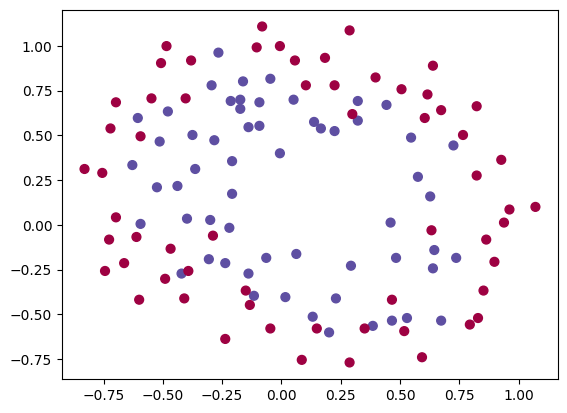

In [64]:
data_columns = ["test1", "test2"]
target_column = "passed"
df = pd.read_csv("tests.csv")
X, y = df[data_columns].values, df[target_column].values

plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

0-th iteration: 0.6930965768760512
1000-th iteration: 0.6838696892621698
2000-th iteration: 0.6791607335547056
3000-th iteration: 0.5429898433029995
4000-th iteration: 0.3796991561105532
5000-th iteration: 0.3492954944502577
6000-th iteration: 0.32519772770697913
7000-th iteration: 0.31193345551074314
8000-th iteration: 0.3028893042671957
9000-th iteration: 0.29525788586247215


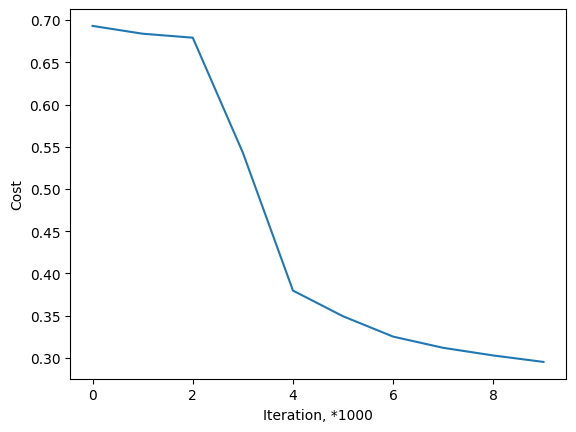

(1, 24)
(24, 2)
Accuracy: 
0.75
Report: 
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.75      0.75      0.75        12

    accuracy                           0.75        24
   macro avg       0.75      0.75      0.75        24
weighted avg       0.75      0.75      0.75        24

Confusion: 
   0  1
0  9  3
1  3  9
(1, 2500)
(2500, 2)


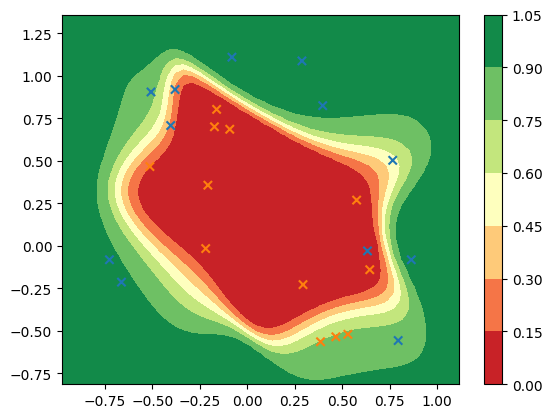

In [65]:
nn = NeuralNet(normalize = True, learning_rate = 0.5, num_iter = 10000)
nn.fit(X_train, y_train)

y_test_pred = nn.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(nn, X_test, y_test)
plt.show()

In [66]:
print(nn.parameters)

{'W1': array([[ 3.12329564, -3.18943397],
       [-0.21930487,  0.27119219],
       [-0.65057002,  0.77650383],
       [-0.17172861,  0.26946502],
       [-0.6012528 ,  0.63014282],
       [-2.87913867, -1.37588709],
       [ 0.11732844,  0.51496227],
       [-0.33639958,  0.29483088],
       [-1.57230627, -4.20642461],
       [-0.27224038,  0.28603634],
       [-0.31509261,  0.28454015],
       [-0.48851964,  0.46878175],
       [-0.19459455,  0.33704033],
       [-0.38246179,  0.31200198],
       [-0.29083876,  0.27932993],
       [-4.53640994, -4.2508523 ],
       [-0.35396142,  0.30131083],
       [-0.54186828,  4.46054241],
       [-8.7708013 , -2.37576352],
       [-1.57251275,  2.90755211]]), 'b1': array([[-4.33547399e+00],
       [ 7.73653584e-02],
       [-1.49394595e+00],
       [ 1.03604778e-01],
       [-1.24332776e+00],
       [-4.10565416e+00],
       [ 3.92880015e-01],
       [-4.25369117e-02],
       [-1.43899297e+00],
       [ 5.00592160e-02],
       [ 1.39965025e-03],

Зверніть увагу на границю прийняття рішення. Модель старається побудувати складну криву, що може свідчити про її перетренування. Порівняйте отримані результати з класом з sklearn. Спробуйте додати нові шари для нашого класу та порівняти результати тоді. Поекспериментуйте з гіперпараметрами для обох класів.

Accuracy: 
0.7916666666666666
Report: 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.82      0.75      0.78        12

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24

Confusion: 
    0  1
0  10  2
1   3  9


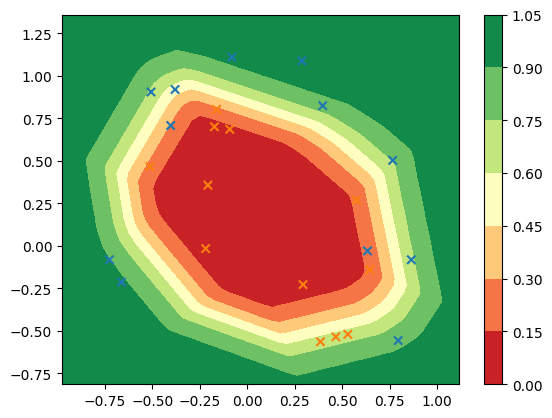

In [67]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes = (20,), max_iter = 10000)#, activation = 'logistic', solver = 'sgd', learning_rate_init = 0.01, learning_rate = 'constant')

clf.fit(X_train, y_train.ravel())
y_test_pred = clf.predict(X_test)

accuracy, report, confusion = evaluate_classification(y_test, y_test_pred)
print(f"Accuracy: \n{accuracy}")
print(f"Report: \n{report}")
print(f"Confusion: \n{confusion}")
plot_decision_boundary(clf, X_test, y_test)
plt.show()

In [68]:
clf.n_iter_

1378